<a href="https://colab.research.google.com/github/gelcloudy/Data-Analysis/blob/main/Cafe%20Dumaguete%20Analysis/Cafe_Dumaguete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- 1. Load Data and Initial Preparation ---

In [3]:
# --- 1. Load Data and Initial Preparation ---
df = pd.read_csv('cafe_dumaguete_dataset.csv')

In [55]:
df.head()

,Date,Branch,Customers,Weather,Promotion,Top_Product,Sales,Month,DayOfWeek,Month_str,ISO_Year,ISO_Week,YearWeek,Week_Num,Week,Promotion_Flag
0,2025-01-01,South,173,Cloudy,Yes,Milk Tea,23659.42,2025-01,Wednesday,January,2025,1,2025-W1,1,2024-12-30,1
1,2025-01-02,North,90,Sunny,No,Milk Tea,12978.45,2025-01,Thursday,January,2025,1,2025-W1,1,2024-12-30,0
2,2025-01-03,South,64,Cloudy,No,Milk Tea,8623.59,2025-01,Friday,January,2025,1,2025-W1,1,2024-12-30,0
3,2025-01-04,South,94,Sunny,No,Pastry,12443.58,2025-01,Saturday,January,2025,1,2025-W1,1,2024-12-30,0
4,2025-01-05,North,114,Sunny,Yes,Americano,15906.84,2025-01,Sunday,January,2025,1,2025-W1,1,2024-12-30,1


In [4]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Sales' and 'Customers' are numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Customers'] = pd.to_numeric(df['Customers'], errors='coerce')
df.dropna(subset=['Sales', 'Customers'], inplace=True)

# Feature Engineering
df['Month'] = df['Date'].dt.to_period('M')
df['DayOfWeek'] = df['Date'].dt.day_name()

# Define a categorical order for days of the week for proper plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

print("Data Loading and Preparation Complete.\n" + "="*50)

Data Loading and Preparation Complete.


In [54]:
df.head()

,Date,Branch,Customers,Weather,Promotion,Top_Product,Sales,Month,DayOfWeek,Month_str,ISO_Year,ISO_Week,YearWeek,Week_Num,Week,Promotion_Flag
0,2025-01-01,South,173,Cloudy,Yes,Milk Tea,23659.42,2025-01,Wednesday,January,2025,1,2025-W1,1,2024-12-30,1
1,2025-01-02,North,90,Sunny,No,Milk Tea,12978.45,2025-01,Thursday,January,2025,1,2025-W1,1,2024-12-30,0
2,2025-01-03,South,64,Cloudy,No,Milk Tea,8623.59,2025-01,Friday,January,2025,1,2025-W1,1,2024-12-30,0
3,2025-01-04,South,94,Sunny,No,Pastry,12443.58,2025-01,Saturday,January,2025,1,2025-W1,1,2024-12-30,0
4,2025-01-05,North,114,Sunny,Yes,Americano,15906.84,2025-01,Sunday,January,2025,1,2025-W1,1,2024-12-30,1


# --- 2. a. What are the monthly and weekly sales trends? ---

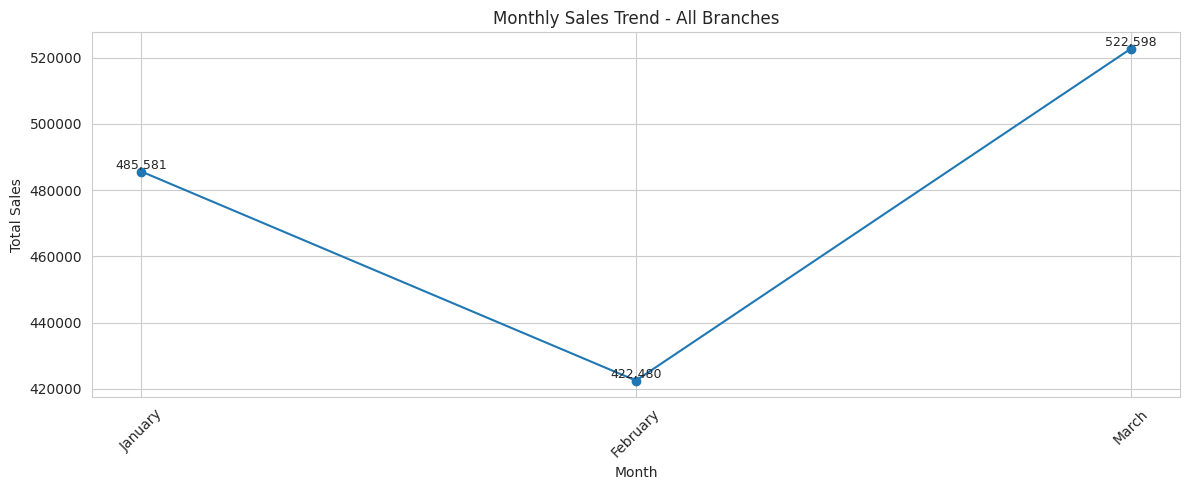

In [13]:
# Convert Month period to month name
df['Month_str'] = df['Month'].dt.strftime('%B')  # or '%b' for short names

# Monthly total sales (all branches combined)
monthly_total = df.groupby('Month_str')['Sales'].sum()

# Ensure months appear in correct order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
monthly_total = monthly_total.reindex(month_order)

plt.figure(figsize=(12,5))
plt.plot(monthly_total.index, monthly_total.values, marker='o')

# Add value labels at each point
for x, y in zip(monthly_total.index, monthly_total.values):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9)

plt.title("Monthly Sales Trend - All Branches")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

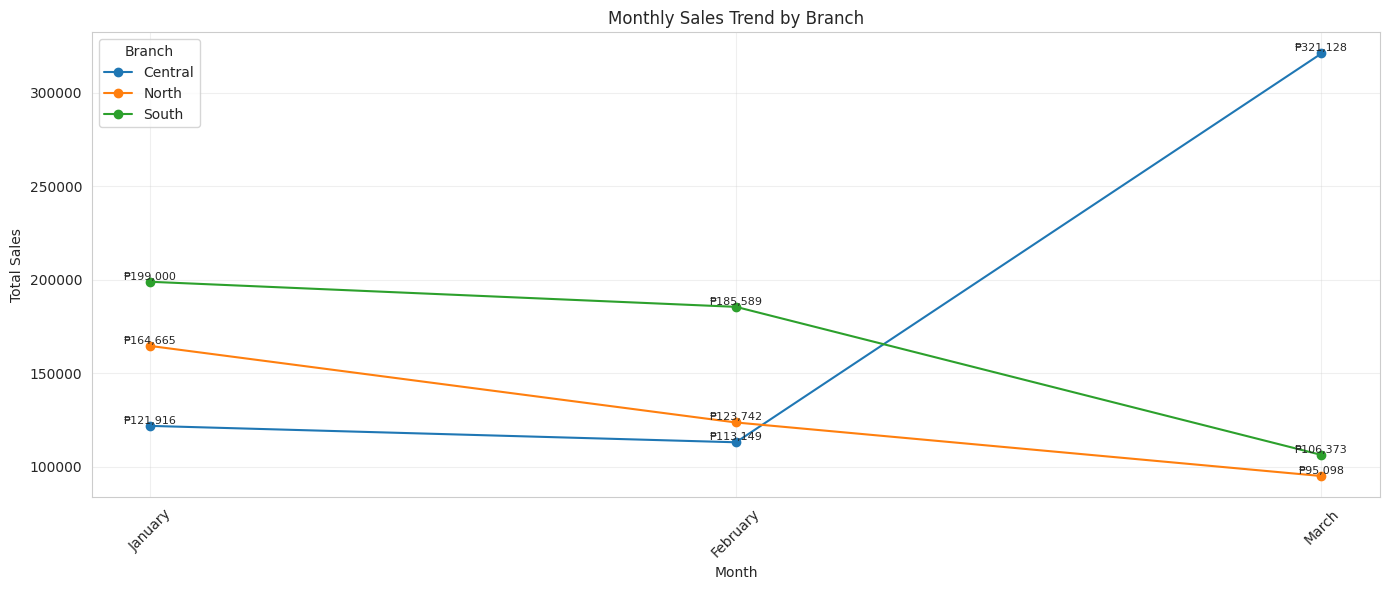

In [14]:
# Convert Month period to month name
df['Month_str'] = df['Month'].dt.strftime('%B')

# Ensure correct month order for plotting
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Create a pivot table: rows = Month, columns = Branch, values = Sales
monthly_branch_sales = df.pivot_table(
    index='Month_str',
    columns='Branch',
    values='Sales',
    aggfunc='sum'
)

# Reindex rows to enforce correct month sequence
monthly_branch_sales = monthly_branch_sales.reindex(month_order)

# Plot a single multi-line chart
plt.figure(figsize=(14,6))

for branch in monthly_branch_sales.columns:
    plt.plot(
        monthly_branch_sales.index,
        monthly_branch_sales[branch],
        marker='o',
        label=branch
    )

    # ✅ ADD DATA POINT LABELS HERE
    for x, y in zip(monthly_branch_sales.index, monthly_branch_sales[branch]):
        if pd.notna(y):  # Avoid labeling missing months
            plt.text(
                x, y,
                f"₱{y:,.0f}",
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.title("Monthly Sales Trend by Branch")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title='Branch')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [22]:
# --- WEEKLY TREND PREPARATION ---

df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime("2025-01-01")
df['Week_Num'] = ((df['Date'] - start_date).dt.days // 7) + 1


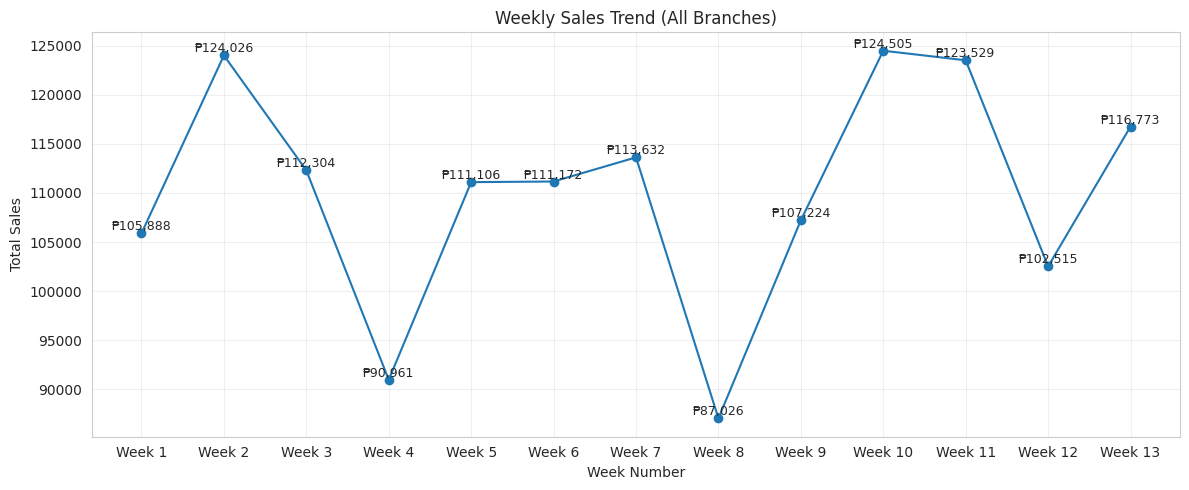

In [21]:
weekly_total = df.groupby('Week_Num')['Sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_total.index, weekly_total.values, marker='o')

# ✅ Data Point Labels
for x, y in zip(weekly_total.index, weekly_total.values):
    plt.text(x, y, f"₱{y:,.0f}", ha='center', va='bottom', fontsize=9)

plt.title("Weekly Sales Trend (All Branches)")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.xticks(weekly_total.index, [f"Week {int(i)}" for i in weekly_total.index])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


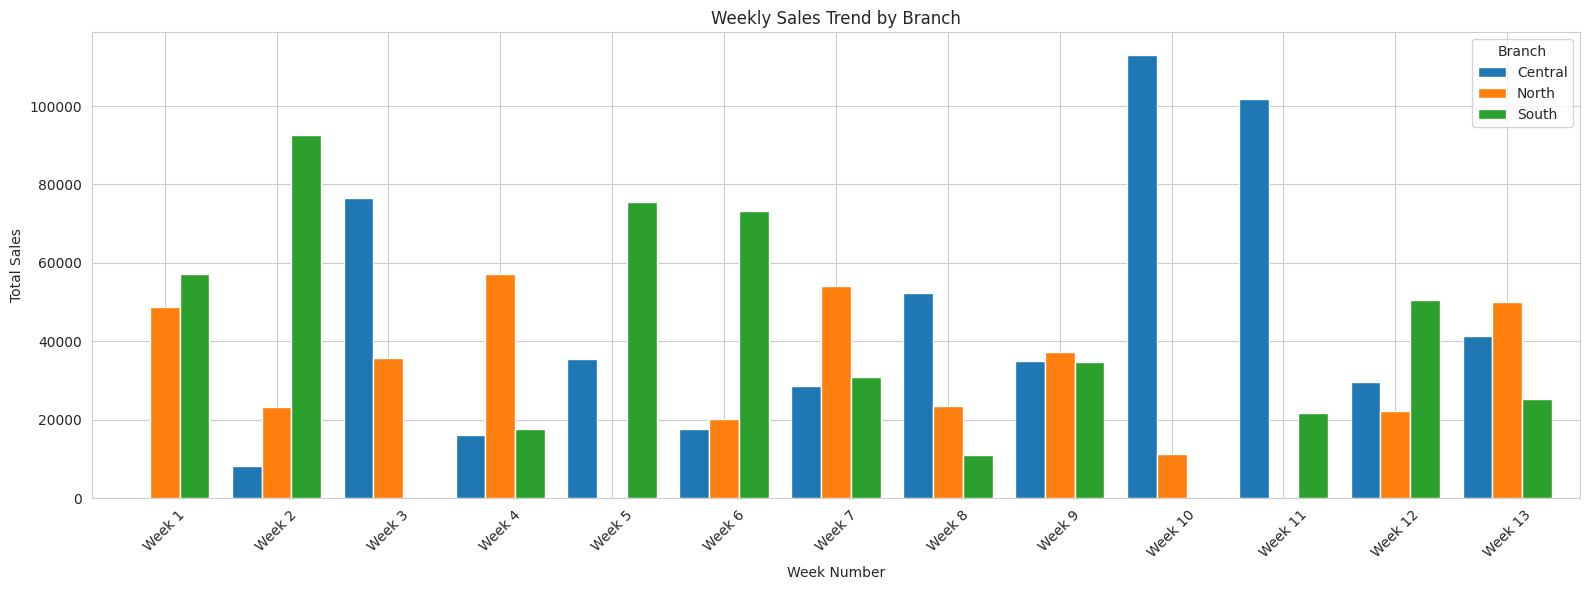

In [27]:
# --- WEEKLY SALES TREND BY BRANCH (Grouped Bar Chart) ---

weekly_branch_sales = (
    df.groupby(['Week_Num','Branch'])['Sales']
    .sum()
    .unstack()
    .fillna(0)
)

weekly_branch_sales.index = range(1, len(weekly_branch_sales)+1)  # ensure week numbers start at 1

weekly_branch_sales.plot(
    kind='bar',
    figsize=(16,6),
    width=0.8
)

plt.title("Weekly Sales Trend by Branch")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.xticks(
    ticks=range(len(weekly_branch_sales.index)),
    labels=[f"Week {i}" for i in weekly_branch_sales.index],
    rotation=45
)
plt.legend(title="Branch")
plt.tight_layout()
plt.show()


In [36]:
import seaborn as sns

In [39]:
# --- BRANCH PERFORMANCE: Separate Charts for Each Metric (With More Space) ---

# Aggregate metrics per branch
branch_summary = df.groupby('Branch').agg(
    Total_Sales=('Sales','sum'),
    Total_Customers=('Customers','sum'),
    Opening_Days=('Date','nunique'),
    Promotions=('Promotion', lambda x: (x=='Yes').sum())
).sort_values('Total_Sales', ascending=False)

# Metrics, colors, titles
metrics = ['Total_Sales','Total_Customers','Opening_Days','Promotions']
colors = ['skyblue','lightgreen','salmon','gold']
titles = ['Total Sales (₱)','Total Customers','Opening Days','Promotions (Yes)']

# Create 2x2 subplot with larger figure
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=branch_summary.index, y=branch_summary[metric], ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i], fontsize=16, pad=15)  # add padding for title
    axes[i].set_xlabel('Branch', fontsize=12, labelpad=10)
    axes[i].set_ylabel('', fontsize=12)
    axes[i].tick_params(axis='y', labelsize=11)
    axes[i].tick_params(axis='x', labelsize=11, rotation=30)  # reduce rotation for clarity

    # Add value labels
    for j, v in enumerate(branch_summary[metric]):
        label = f"₱{v:,.0f}" if metric=='Total_Sales' else str(v)
        axes[i].text(j, v + max(branch_summary['Total_Sales'])*0.02, label, ha='center', va='bottom', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.35, wspace=0.25)

plt.suptitle("Branch Performance Overview", fontsize=18, y=0.95)
plt.show()

/tmp/ipython-input-3047148937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='coolwarm')


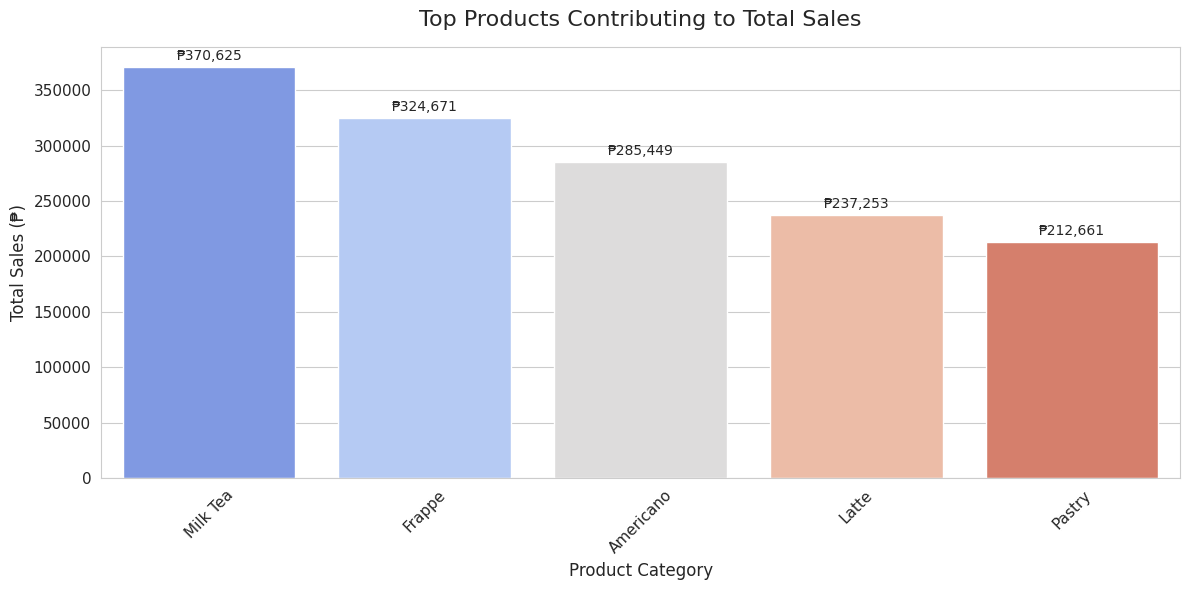

In [40]:
# --- TOP PRODUCTS CONTRIBUTING TO TOTAL SALES ---

# Aggregate total sales by product
product_sales = df.groupby('Top_Product')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='coolwarm')

plt.title("Top Products Contributing to Total Sales", fontsize=16, pad=15)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales (₱)", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on top of bars
for i, v in enumerate(product_sales.values):
    plt.text(i, v + max(product_sales.values)*0.01, f"₱{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1152018619.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-1152018619.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette='viridis')
/tmp/ipython-input-1152018619.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette='viridis')


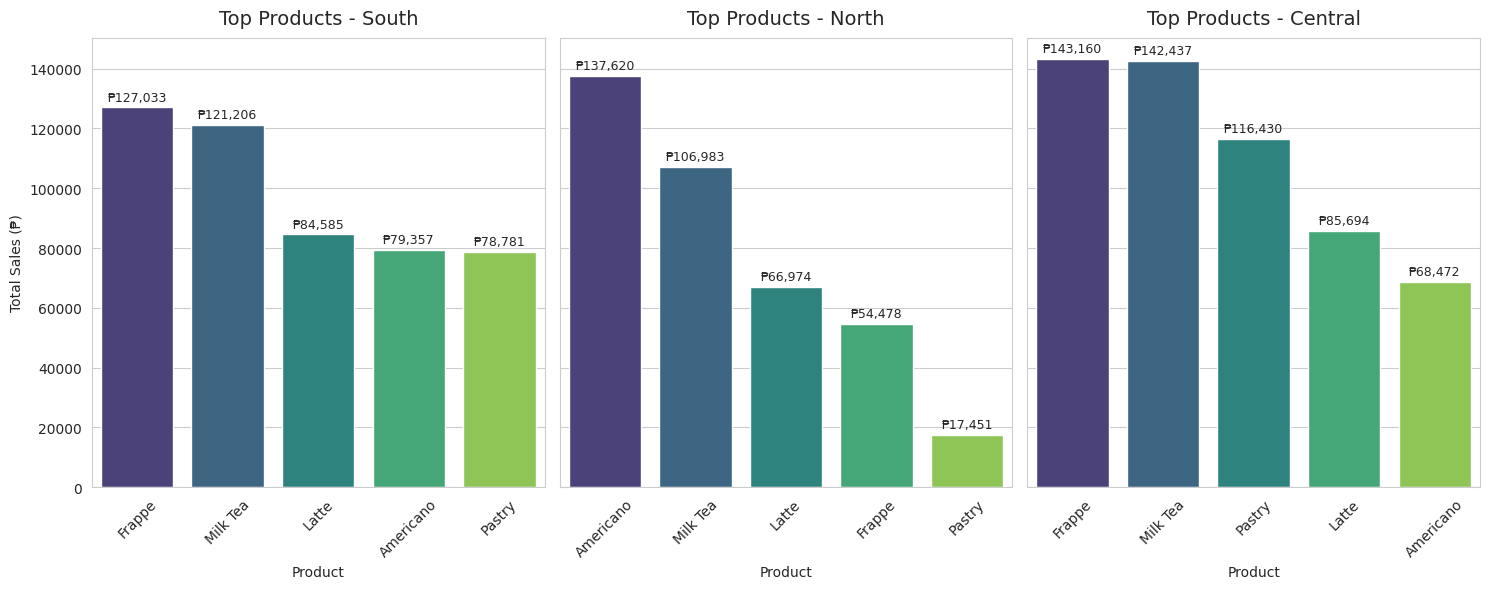

In [42]:
# --- TOP 5 PRODUCTS PER BRANCH ---

# Get unique branches
branches = df['Branch'].unique()
top_n = 5  # top 5 products

# Figure size
fig, axes = plt.subplots(1, len(branches), figsize=(5*len(branches),6), sharey=True)

for i, branch in enumerate(branches):
    # Filter data for branch and aggregate sales by product
    branch_product_sales = df[df['Branch']==branch].groupby('Top_Product')['Sales'].sum()
    branch_product_sales = branch_product_sales.sort_values(ascending=False).head(top_n)

    # Plot bar chart
    sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Top Products - {branch}", fontsize=14, pad=10)
    axes[i].set_xlabel("Product")
    axes[i].set_ylabel("Total Sales (₱)" if i==0 else "")  # only first y-axis label
    axes[i].tick_params(axis='x', rotation=45)

    # Add value labels
    for j, v in enumerate(branch_product_sales.values):
        axes[i].text(j, v + max(branch_product_sales.values)*0.01, f"₱{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3473239424.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette=bar_colors)
/tmp/ipython-input-3473239424.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette=bar_colors)
/tmp/ipython-input-3473239424.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette=bar_colors)


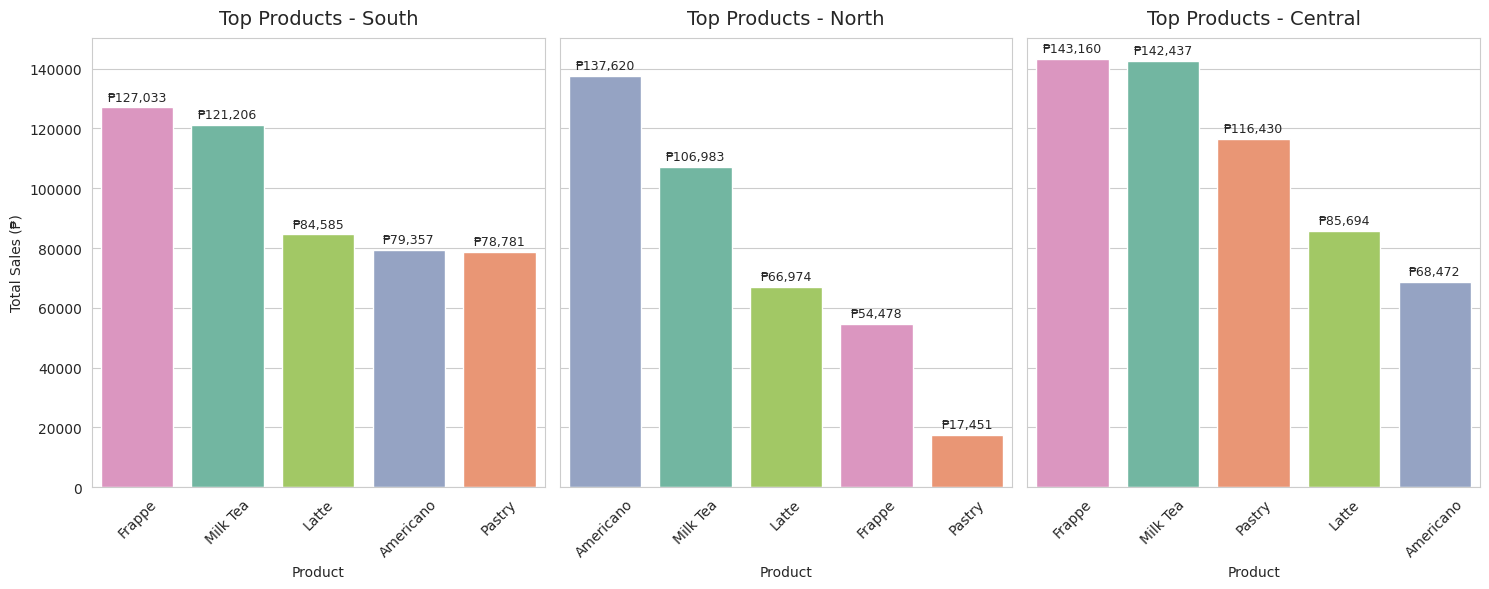

In [56]:
# --- TOP 5 PRODUCTS PER BRANCH WITH CONSISTENT COLORS ---

import matplotlib.colors as mcolors

# Get unique branches and products
branches = df['Branch'].unique()
products = df['Top_Product'].unique()

# Assign consistent colors to products
colors = sns.color_palette("Set2", len(products))  # choose a palette
product_colors = {product: color for product, color in zip(products, colors)}

top_n = 5  # top 5 products

# Figure size
fig, axes = plt.subplots(1, len(branches), figsize=(5*len(branches),6), sharey=True)

for i, branch in enumerate(branches):
    # Filter data for branch and aggregate sales by product
    branch_product_sales = df[df['Branch']==branch].groupby('Top_Product')['Sales'].sum()
    branch_product_sales = branch_product_sales.sort_values(ascending=False).head(top_n)

    # Map colors for the top products in this branch
    bar_colors = [product_colors[p] for p in branch_product_sales.index]

    # Plot bar chart
    sns.barplot(x=branch_product_sales.index, y=branch_product_sales.values, ax=axes[i], palette=bar_colors)
    axes[i].set_title(f"Top Products - {branch}", fontsize=14, pad=10)
    axes[i].set_xlabel("Product")
    axes[i].set_ylabel("Total Sales (₱)" if i==0 else "")  # only first y-axis label
    axes[i].tick_params(axis='x', rotation=45)

    # Add value labels
    for j, v in enumerate(branch_product_sales.values):
        axes[i].text(j, v + max(branch_product_sales.values)*0.01, f"₱{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

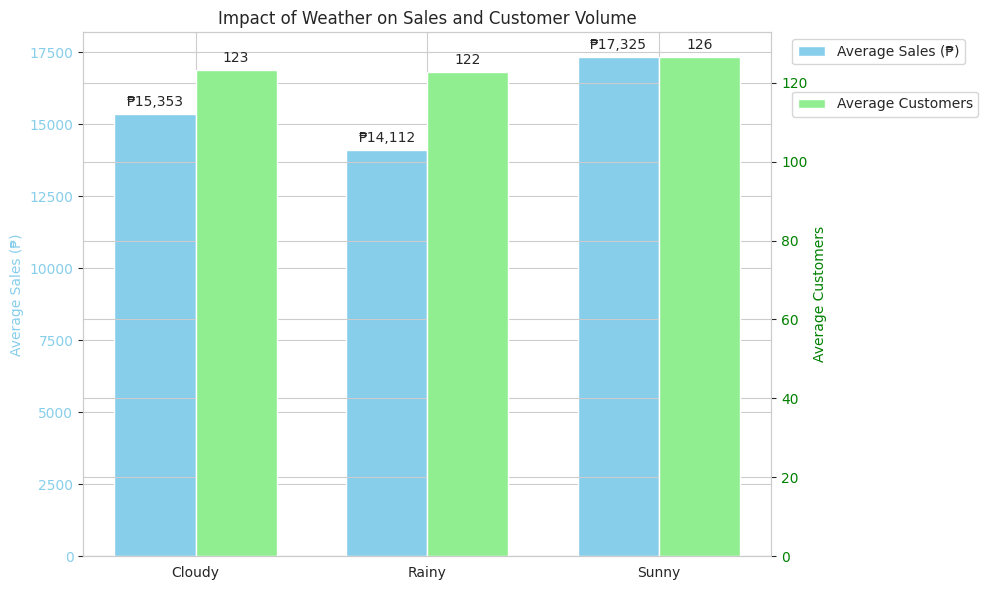

In [48]:
# --- IMPACT OF WEATHER ON SALES AND CUSTOMERS ---

# Aggregate average sales and customers per weather type
weather_summary = df.groupby('Weather').agg(
    Avg_Sales=('Sales','mean'),
    Avg_Customers=('Customers','mean')
).sort_index()

# Plotting side-by-side bars
fig, ax1 = plt.subplots(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(weather_summary.index))

# Average Sales bars
bars1 = ax1.bar(x - bar_width/2, weather_summary['Avg_Sales'], width=bar_width, label='Average Sales (₱)', color='skyblue')
ax1.set_ylabel('Average Sales (₱)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Average Customers bars (secondary y-axis)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, weather_summary['Avg_Customers'], width=bar_width, label='Average Customers', color='lightgreen')
ax2.set_ylabel('Average Customers', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(weather_summary.index)
plt.title("Impact of Weather on Sales and Customer Volume")

# Legends outside the chart
ax1.legend([bars1], ['Average Sales (₱)'], loc='upper left', bbox_to_anchor=(1.02, 1))
ax2.legend([bars2], ['Average Customers'], loc='upper left', bbox_to_anchor=(1.02, 0.9))

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + max(weather_summary['Avg_Sales'])*0.01,
             f"₱{height:,.0f}", ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + max(weather_summary['Avg_Customers'])*0.01,
             f"{int(height)}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2989686876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promotion', y='Sales', data=df, palette=['lightcoral','lightgreen'])


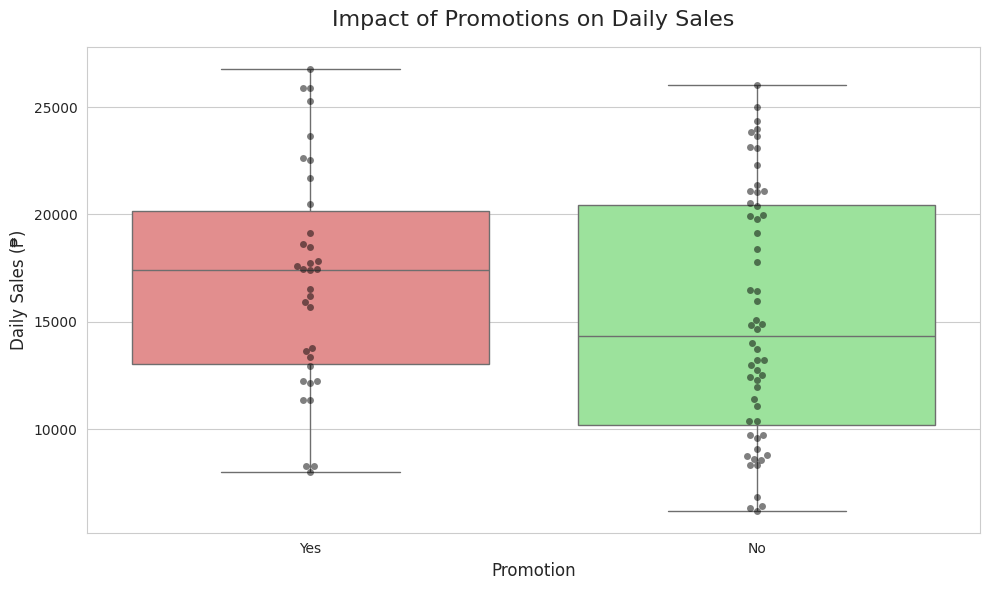

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Promotion', y='Sales', data=df, palette=['lightcoral','lightgreen'])

plt.title("Impact of Promotions on Daily Sales", fontsize=16, pad=15)
plt.xlabel("Promotion", fontsize=12)
plt.ylabel("Daily Sales (₱)", fontsize=12)

# Optional: add swarmplot for individual data points
sns.swarmplot(x='Promotion', y='Sales', data=df, color='black', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipython-input-545233702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promotion', y='Sales', data=df, palette=['lightcoral','lightgreen'])


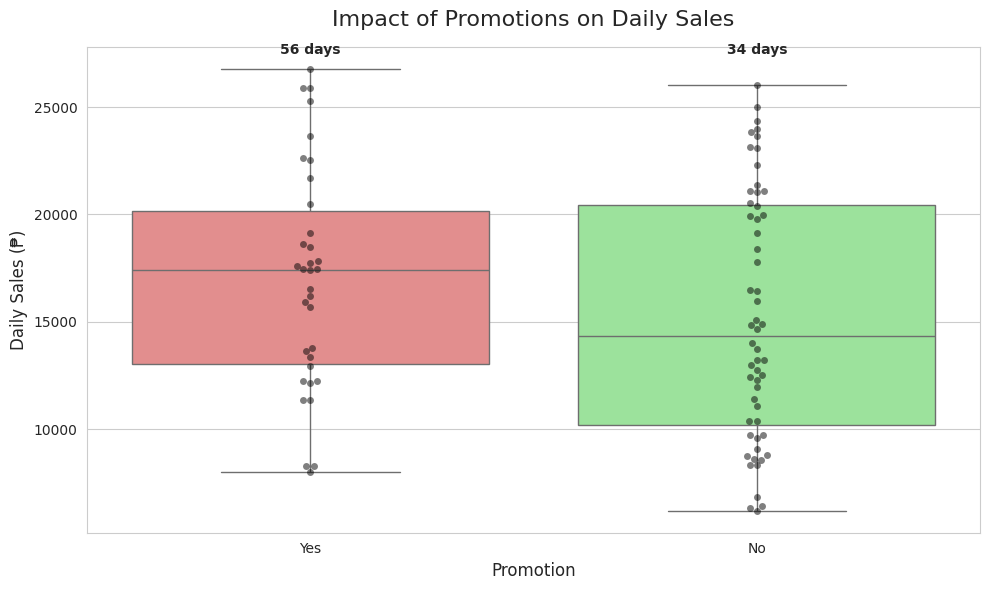

In [57]:
# --- Impact of Promotions on Daily Sales ---

plt.figure(figsize=(10,6))
sns.boxplot(x='Promotion', y='Sales', data=df, palette=['lightcoral','lightgreen'])

# Optional: add swarmplot for individual data points
sns.swarmplot(x='Promotion', y='Sales', data=df, color='black', alpha=0.5)

# Title and axis labels
plt.title("Impact of Promotions on Daily Sales", fontsize=16, pad=15)
plt.xlabel("Promotion", fontsize=12)
plt.ylabel("Daily Sales (₱)", fontsize=12)

# Count the number of days for each promotion status
promo_counts = df['Promotion'].value_counts()
for i, promo_status in enumerate(promo_counts.index):
    count = promo_counts[promo_status]
    plt.text(i, df['Sales'].max()*1.02, f"{count} days", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

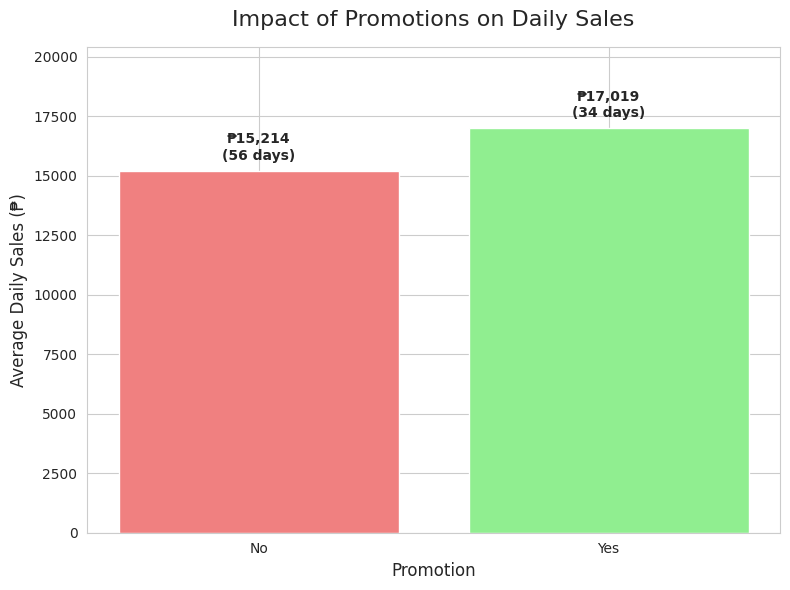

In [58]:
# Aggregate average sales per promotion status
promo_summary = df.groupby('Promotion').agg(
    Avg_Sales=('Sales', 'mean'),
    Days=('Sales', 'count')
).reset_index()

plt.figure(figsize=(8,6))
bars = plt.bar(promo_summary['Promotion'], promo_summary['Avg_Sales'], color=['lightcoral','lightgreen'])

# Add value labels for average sales and number of days
for bar, avg, days in zip(bars, promo_summary['Avg_Sales'], promo_summary['Days']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(promo_summary['Avg_Sales'])*0.02,
             f"₱{avg:,.0f}\n({days} days)", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Impact of Promotions on Daily Sales", fontsize=16, pad=15)
plt.xlabel("Promotion", fontsize=12)
plt.ylabel("Average Daily Sales (₱)", fontsize=12)
plt.ylim(0, promo_summary['Avg_Sales'].max()*1.2)  # Add some space above bars

plt.tight_layout()
plt.show()